In [ ]:
import cv2img

In [ ]:
cv2img.mains(imgin="certs\\1.jpeg", imgout="cert1")

In [1]:
import json
import os
import sys
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

In [10]:
missing_env = False
# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']
else:
    print("From Azure Cogntivie Service, retrieve your endpoint and subscription key.")
    print("\nSet the COMPUTER_VISION_ENDPOINT environment variable, such as \"https://westus2.api.cognitive.microsoft.com\".\n")
    missing_env = True

if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("From Azure Cogntivie Service, retrieve your endpoint and subscription key.")
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable, such as \"1234567890abcdef1234567890abcdef\".\n")
    missing_env = True

if missing_env:
    print("**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

text_recognition_url = endpoint + "/v3.0-preview/read/analyze"

In [14]:
# Set image_url to the URL of an image that you want to recognize.
image_url = "https://raw.githubusercontent.com/gpnagar/Img-to-txt-v1/master/certs/11.png"

# Set the langauge that you want to recognize. The value can be "en" for English, and "es" for Spanish
language = "en"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data, params={'language': language})
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    
    print(json.dumps(analysis, indent=4))

    time.sleep(1)
    if ("analyzeResult" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'failed'):
        poll = False

polygons = []
if ("analyzeResult" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["analyzeResult"]["readResults"][0]["lines"]]
# Display the image and overlay it with the extracted text.
image = Image.open(BytesIO(requests.get(image_url).content))

HTTPError: 401 Client Error: Access Denied for url: https://westcentralus.api.cognitive.microsoft.com/vision/v3.0-preview/read/analyze?language=en

In [ ]:

ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
plt.show()

{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 271.35, 'width': 416, 'height': 540, 'unit': 'pixel', 'lines': [{'boundingBox': [90, 524, 107, 34, 132, 35, 116, 525], 'text': 'GOVERNMENT POLYTECHNIC AHMEDNAGAR', 'words': [{'boundingBox': [92, 521, 98, 362, 122, 363, 116, 522], 'text': 'GOVERNMENT'}, {'boundingBox': [98, 357, 103, 198, 128, 198, 122, 358], 'text': 'POLYTECHNIC'}, {'boundingBox': [103, 191, 107, 35, 132, 36, 128, 192], 'text': 'AHMEDNAGAR'}]}, {'boundingBox': [123, 378, 131, 175, 148, 175, 140, 379], 'text': 'Burudgaon Road, Ahmednagar (MS.)', 'words': [{'boundingBox': [126, 376, 128, 317, 142, 317, 139, 375], 'text': 'Burudgaon', 'confidence': 'Low'}, {'boundingBox': [128, 314, 128, 282, 143, 282, 142, 314], 'text': 'Road,'}, {'boundingBox': [129, 279, 130, 211, 146, 211, 143, 279], 'text': 'Ahmednagar'}, {'boundingBox': [130, 208, 131, 175, 148, 176, 147, 209], 'text': '(MS.)', 'confidence': 'Low'}]}, {'boundingBox': [208, 524, 216, 1

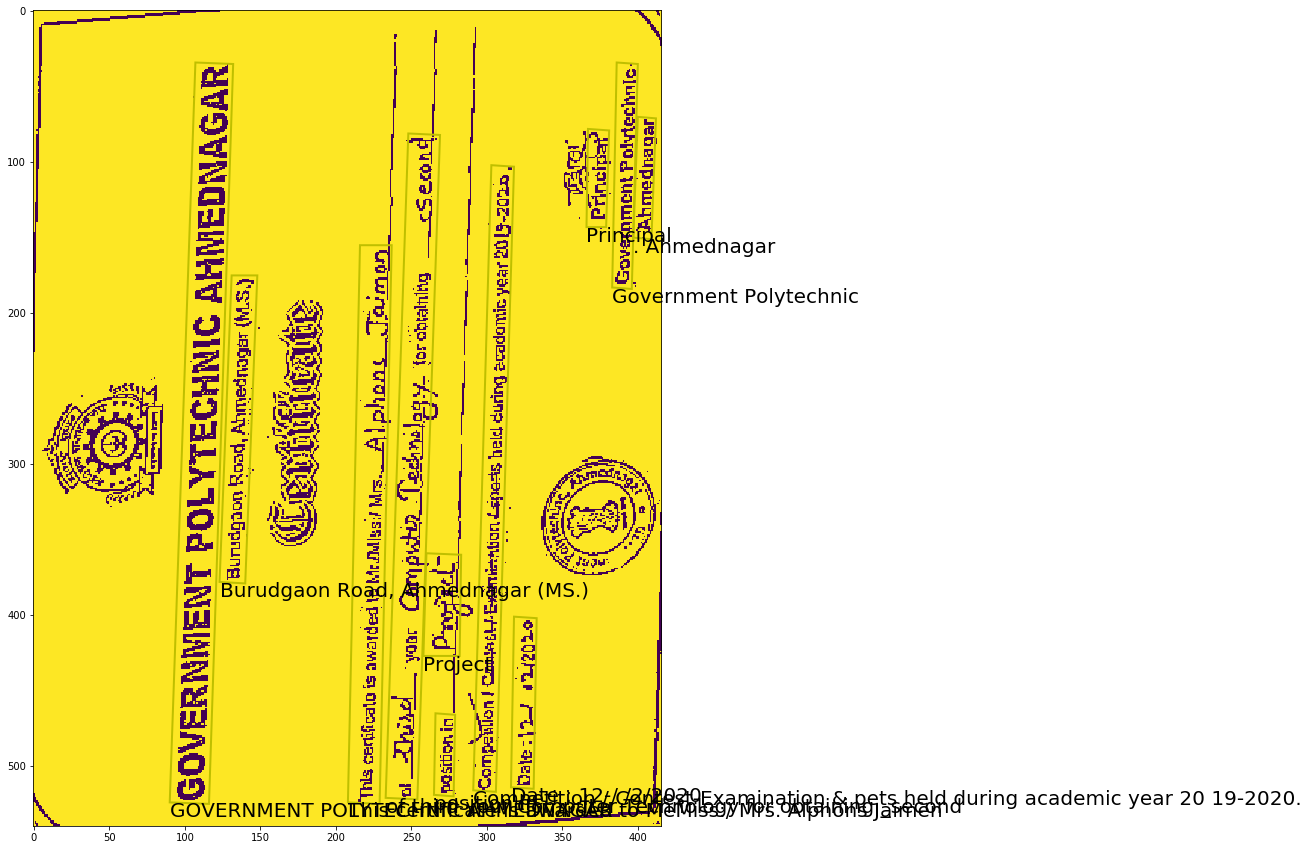

In [21]:
import os
import sys
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

text_recognition_url = endpoint + "/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://raw.githubusercontent.com/gpnagar/Img-to-txt-v1/master/certs/11.png"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")